## XGBoost 優化 一目均線表策略信號 [單一股票績效]

In [ ]:
!pip install tejapi
!pip install zipline-tej


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.3/531.3 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:0

In [ ]:
import pandas as pd
import numpy as np
import tejapi
import os
import matplotlib.pyplot as plt

tej_key ='your tej api key'
tejapi.ApiConfig.api_key = tej_key
os.environ['TEJAPI_BASE'] = "your base"
os.environ['TEJAPI_KEY'] = tej_key

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
!wget -O MicrosoftJhengHei.ttf https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
!wget -O ArialUnicodeMS.ttf https://github.com/texttechnologylab/DHd2019BoA/raw/master/fonts/Arial%20Unicode%20MS.TTF

fm.fontManager.addfont('MicrosoftJhengHei.ttf')
matplotlib.rc('font', family='Microsoft Jheng Hei')

matplotlib.font_manager.fontManager.addfont('ArialUnicodeMS.ttf')
matplotlib.rc('font', family='Arial Unicode MS')

--2025-02-27 07:18:30--  https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf [following]
--2025-02-27 07:18:30--  https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21663376 (21M) [application/octet-stream]
Saving to: ‘MicrosoftJhengHei.ttf’

MicrosoftJhengHei.t 100%[===================>]  20.66M  95.0MB/s    in 0.2s    

2025-02-27 07:18:31 (95.0 MB/s) - ‘MicrosoftJhengHei.ttf’ saved [21663376/21663376]


In [ ]:
import TejToolAPI

start_date = '2006-01-01'; end_date = '2024-12-31'
pool = ['6446']
start = pd.Timestamp(start_date, tz = 'utc')
end = pd.Timestamp(end_date, tz = 'utc')
columns = ['coid','Industry', 'vol', 'open_d', 'high_d', 'low_d', 'close_d', 'roi']
df = TejToolAPI.get_history_data(start = start, end = end,
                                 ticker = pool,
                                 columns = columns,
                                 transfer_to_chinese = True)

df

Currently used TEJ API key call quota 806/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 117631431/9223372036854775807 (0.0%)


,股票代碼,日期,主產業別_中文,開盤價,報酬率,最高價,最低價,收盤價,成交量_千股
0,6446,2016-07-19,OTC17 OTC 化學生技,200.0,25.4717,203.0,195.0,199.5,7072.0
1,6446,2016-07-20,OTC17 OTC 化學生技,200.0,6.0150,213.0,200.0,211.5,3712.0
2,6446,2016-07-21,OTC17 OTC 化學生技,211.0,-3.0733,212.5,203.0,205.0,2422.0
3,6446,2016-07-22,OTC17 OTC 化學生技,205.5,-2.9268,206.5,199.0,199.0,2113.0
4,6446,2016-07-25,OTC17 OTC 化學生技,200.0,-3.5176,200.0,190.5,192.0,1734.0
...,...,...,...,...,...,...,...,...,...
2061,6446,2024-12-25,M1700 化學生技醫療,615.0,-0.1647,620.0,599.0,606.0,1329.0
2062,6446,2024-12-26,M1700 化學生技醫療,609.0,0.3300,615.0,605.0,608.0,856.0
2063,6446,2024-12-27,M1700 化學生技醫療,612.0,-0.6579,616.0,599.0,604.0,942.0
2064,6446,2024-12-30,M1700 化學生技醫療,601.0,-0.3311,615.0,601.0,602.0,892.0


In [ ]:
def ichimoku_cloud(df):

    high_9 = df['最高價'].rolling(window = 9).max()
    low_9 = df['最低價'].rolling(window = 9).min()

    df['Tenkan_sen'] = (high_9 + low_9) / 2

    high_26 = df['最高價'].rolling(window = 26).max()
    low_26 = df['最低價'].rolling(window = 26).min()

    df['Kijun_sen'] = (high_26 + low_26) / 2

    df['Senkou_Span_A'] = ((df['Tenkan_sen'] + df['Kijun_sen']) / 2).shift(26)

    high_52 = df['最高價'].rolling(window = 52).max()
    low_52 = df['最低價'].rolling(window = 52).min()
    df['Senkou_Span_B'] = ((high_52 + low_52) / 2).shift(26)

    df['Chikou_Span'] = df['收盤價'].shift(-26)

    df['Cloud'] = np.where(
    df['Senkou_Span_A'] < df['Senkou_Span_B'],
    'red',
    'green')


    return df

df = ichimoku_cloud(df)
df

,股票代碼,日期,主產業別_中文,開盤價,報酬率,最高價,最低價,收盤價,成交量_千股,Tenkan_sen,Kijun_sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span,Cloud
0,6446,2016-07-19,OTC17 OTC 化學生技,200.0,25.4717,203.0,195.0,199.5,7072.0,NaN,NaN,NaN,NaN,171.0,green
1,6446,2016-07-20,OTC17 OTC 化學生技,200.0,6.0150,213.0,200.0,211.5,3712.0,NaN,NaN,NaN,NaN,172.0,green
2,6446,2016-07-21,OTC17 OTC 化學生技,211.0,-3.0733,212.5,203.0,205.0,2422.0,NaN,NaN,NaN,NaN,170.5,green
3,6446,2016-07-22,OTC17 OTC 化學生技,205.5,-2.9268,206.5,199.0,199.0,2113.0,NaN,NaN,NaN,NaN,167.5,green
4,6446,2016-07-25,OTC17 OTC 化學生技,200.0,-3.5176,200.0,190.5,192.0,1734.0,NaN,NaN,NaN,NaN,162.0,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,6446,2024-12-25,M1700 化學生技醫療,615.0,-0.1647,620.0,599.0,606.0,1329.0,591.5,581.5,603.50,647.5,NaN,red
2062,6446,2024-12-26,M1700 化學生技醫療,609.0,0.3300,615.0,605.0,608.0,856.0,591.5,581.5,603.00,647.0,NaN,red
2063,6446,2024-12-27,M1700 化學生技醫療,612.0,-0.6579,616.0,599.0,604.0,942.0,591.5,581.5,602.75,647.0,NaN,red
2064,6446,2024-12-30,M1700 化學生技醫療,601.0,-0.3311,615.0,601.0,602.0,892.0,593.0,581.5,602.75,647.0,NaN,red


In [ ]:
# 先產生原始信號
conditions = [
    (df['收盤價'] > df['Senkou_Span_B']) & (df['Cloud'] == 'red') & (df['Tenkan_sen'] > df['Kijun_sen'] * 0.01),
    (df['收盤價'] < df['Senkou_Span_B']) & (df['Cloud'] == 'green') & (df['Tenkan_sen'] < df['Kijun_sen'] * 0.99)
]
choices = ['Buy', 'Sell']
df['RawSignal'] = np.select(conditions, choices, default=np.nan)

# 只保留信號變化的那一刻，連續相同的信號僅保留第一筆
df['Signal'] = df['RawSignal'].where(df['RawSignal'] != df['RawSignal'].shift())
df['Signal'] = np.where(df['Signal'].isin(['Buy', 'Sell']), df['Signal'], 'Hold')

df['Buy_Point'] = np.where(df['Signal'] == 'Buy', df['收盤價'], np.nan)
df['Sell_Point'] = np.where(df['Signal'] == 'Sell', df['收盤價'], np.nan)

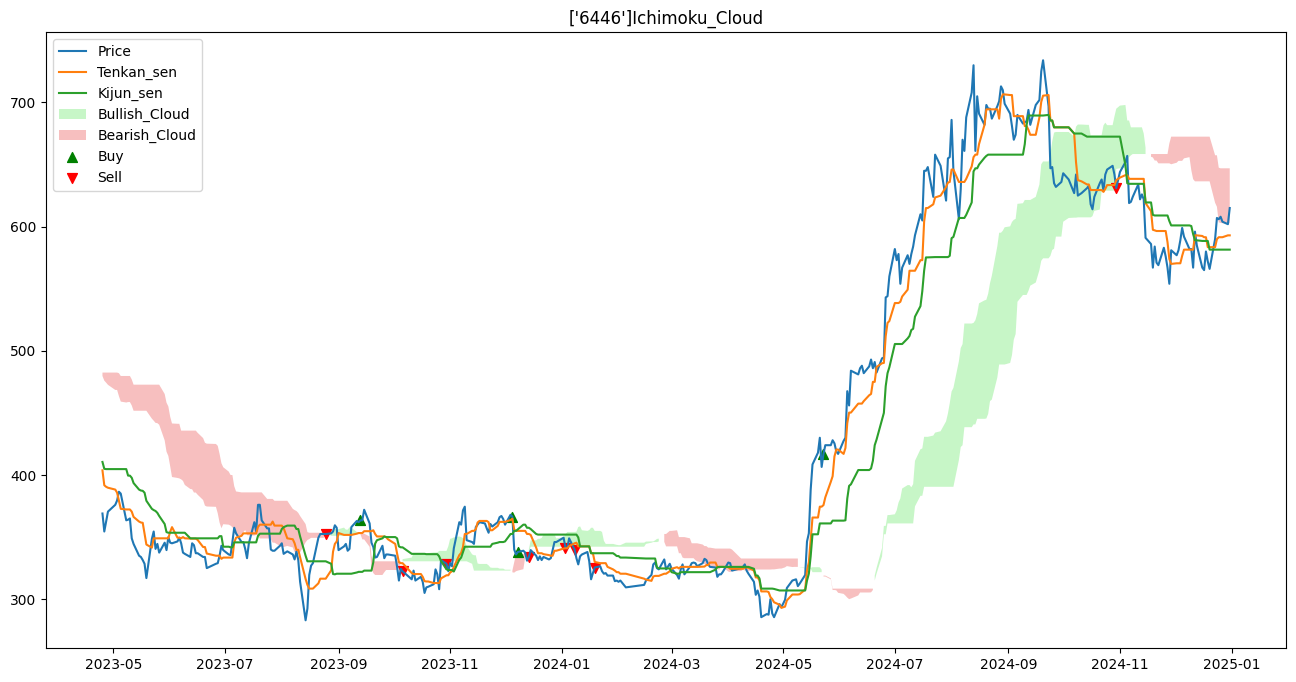

In [ ]:
tab10 = [
    "#1f77b4",  # C0 - 藍色
    "#ff7f0e",  # C1 - 橙色
    "#2ca02c",  # C2 - 綠色
    "#d62728",  # C3 - 紅色
    "#9467bd",  # C4 - 紫色
    "#8c564b",  # C5 - 棕色
    "#e377c2",  # C6 - 粉色
    "#7f7f7f",  # C7 - 灰色
    "#bcbd22",  # C8 - 黃綠色
    "#17becf"   # C9 - 青色
]
split_index = int(len(df) * 0.8)

data = df.iloc[split_index:].copy()

data = data.set_index('日期', drop = False)
plt.figure(figsize = (16,8))
plt.style.use("default")
plt.plot(data.index, data['收盤價'], color=tab10[0], label='Price')
plt.plot(data.index, data['Tenkan_sen'], color=tab10[1], label='Tenkan_sen')
plt.plot(data.index, data['Kijun_sen'], color=tab10[2], label='Kijun_sen')
plt.fill_between(data.index, data['Senkou_Span_A'], data['Senkou_Span_B'],
                    where=data['Senkou_Span_A'] >= data['Senkou_Span_B'],
                    facecolor='lightgreen', alpha=0.5, label='Bullish_Cloud')
plt.fill_between(data.index, data['Senkou_Span_A'], data['Senkou_Span_B'],
                    where=data['Senkou_Span_A'] < data['Senkou_Span_B'],
                    facecolor='lightcoral', alpha=0.5, label='Bearish_Cloud')

# 利用 scatter 畫出買入點 (用向上三角形表示)
plt.scatter(data.index, data['Buy_Point'], marker='^', color='green', s=50, label='Buy')

# 利用 scatter 畫出賣出點 (用向下三角形表示)
plt.scatter(data.index, data['Sell_Point'], marker='v', color='red', s=50, label='Sell')

plt.title(f'{pool}Ichimoku_Cloud')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [ ]:
data_ml = df[:].copy()
# 設定交易信號：如果未來 5 天內價格上漲 3%，則標記為 'Buy'
data_ml['Target'] = np.where(data_ml['收盤價'].shift(-5) > data_ml['收盤價'] * 1.03, 'Buy',
                                np.where(data_ml['收盤價'].shift(-5) < data_ml['收盤價'] * 0.97, 'Sell', 'Hold'))

# 把 'Buy'、'Sell'、'Hold' 轉成數字（0, 1, 2）
data_ml['Target'] = data_ml['Target'].map({'Buy': 1, 'Sell': 2, 'Hold': 0})



In [ ]:
# 1. 資料讀取與前處理
data_ml = data_ml.set_index('日期', drop = False)

# 若想預測隔天收盤價，可以將目標設為收盤價向前平移一個交易日
data_ml['目標收盤價'] = data_ml['收盤價'].shift(-1)

# 2. 特徵與目標設定
# 這裡僅用最基本的價格與成交量作為特徵，你也可以加入其他技術指標（例如 MA、RSI 等）
features = ['開盤價', '最高價', '最低價', '收盤價', '成交量_千股']
features2 = ['Tenkan_sen','Kijun_sen', 'Senkou_Span_A', 'Senkou_Span_B','Chikou_Span', '收盤價', '成交量_千股','開盤價', '最高價', '最低價']
X = data_ml[features2]
y = data_ml['Target']


# 3. 資料切分（依時間順序切分，不建議隨機切分）
# 切分時間點為 2021-03-04
split_index = int(len(data_ml) * 0.8)

X_train, X_test = X.iloc[52:split_index], X.iloc[split_index:-1]
y_train, y_test = y.iloc[52:split_index], y.iloc[split_index:-1]
dates_test = data_ml['日期'].iloc[split_index:-1]  # 用於後續繪圖


model = xgb.XGBClassifier(
    n_estimators=500,  # 樹的數量
    max_depth=5,       # 控制樹的深度，防止過擬合
    learning_rate=0.05, # 設定學習率
    subsample=0.8,     # 使用 80% 數據訓練每棵樹，提高泛化能力
    colsample_bytree=0.8,  # 降低過擬合風險
    random_state=42,
    use_label_encoder=False,  # 避免 warning
    eval_metric="mlogloss"  # 適合多類別分類
)


# 訓練 XGBoost 模型
model.fit(X_train, y_train)

# 進行預測
y_pred = model.predict(X_test)




--2025-02-27 07:24:18--  https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf [following]
--2025-02-27 07:24:18--  https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21663376 (21M) [application/octet-stream]
Saving to: ‘MicrosoftJhengHei.ttf’

MicrosoftJhengHei.t 100%[===================>]  20.66M   103MB/s    in 0.2s    

2025-02-27 07:24:18 (103 MB/s) - ‘MicrosoftJhengHei.ttf’ saved [21663376/21663376]



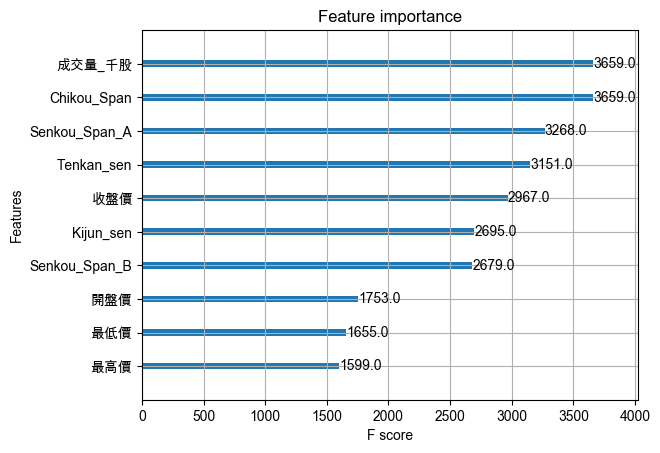

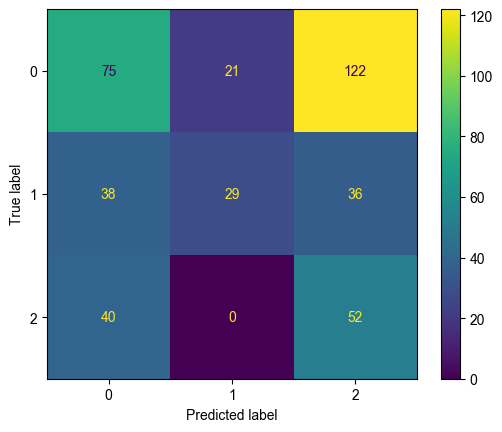

              precision    recall  f1-score   support

           0       0.49      0.34      0.40       218
           1       0.58      0.28      0.38       103
           2       0.25      0.57      0.34        92

    accuracy                           0.38       413
   macro avg       0.44      0.40      0.38       413
weighted avg       0.46      0.38      0.38       413



In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
!wget -O MicrosoftJhengHei.ttf https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
!wget -O ArialUnicodeMS.ttf https://github.com/texttechnologylab/DHd2019BoA/raw/master/fonts/Arial%20Unicode%20MS.TTF

fm.fontManager.addfont('MicrosoftJhengHei.ttf')
matplotlib.rc('font', family='Microsoft Jheng Hei')

matplotlib.font_manager.fontManager.addfont('ArialUnicodeMS.ttf')
matplotlib.rc('font', family='Arial Unicode MS')

# 產生分類報告
print(classification_report(y_test, y_pred))

# 繪製特徵重要性圖
xgb.plot_importance(model)
plt.show()



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 顯示混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

,count
Predicted_Signal,
2,210
0,153
1,50


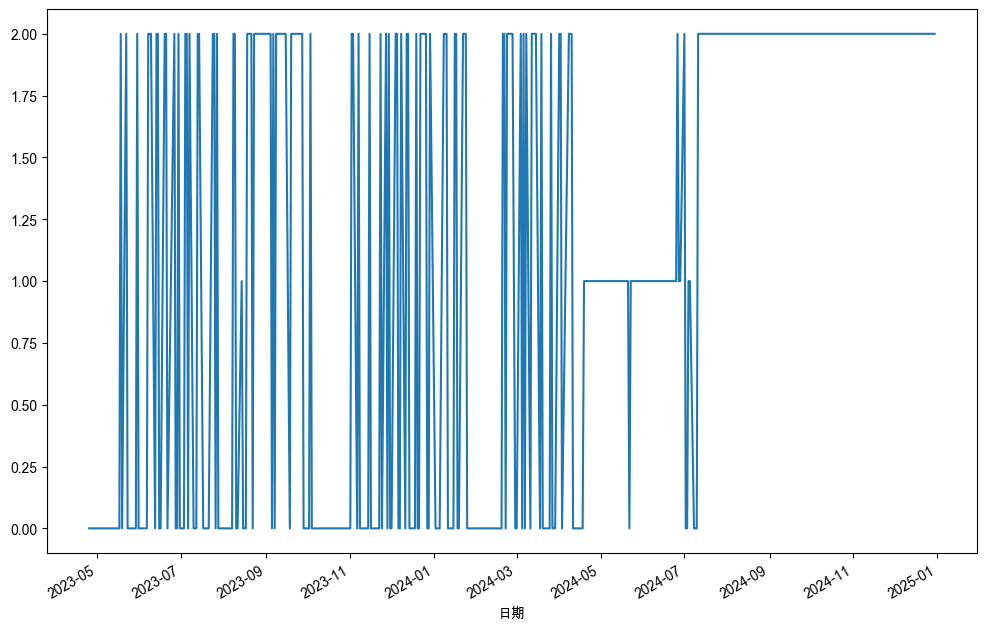

In [ ]:
df_test = df.iloc[split_index:-1].copy()  # 取得測試集的對應資料
df_test['日期'] = pd.to_datetime(df_test['日期'])
df_test = df_test.set_index('日期', drop = False)
df_test['Predicted_Signal'] = y_pred  # 新增預測結果


df_test['Predicted_Signal'].plot(figsize = (12, 8))
df_test['Predicted_Signal'].value_counts()

In [ ]:
from zipline.data.run_ingest import simple_ingest
from zipline.api import set_slippage, set_commission, set_benchmark,  symbol,  record
from zipline.api import order_target_percent, order_percent, order
from zipline.api import set_long_only, set_max_leverage

from zipline.finance import commission, slippage
from zipline import run_algorithm

In [ ]:
pools = pool + ['IR0001']

start_ingest = start_date.replace('-', '')
end_ingest = end_date.replace('-', '')

simple_ingest(name = 'tquant' , tickers = pools , start_date = start_ingest , end_date = end_ingest)

Now ingesting data.
End of ingesting tquant.
Please call function `get_bundle(start_dt = pd.Timestamp('20060101', tz = 'utc'),end_dt = pd.Timestamp('20241231' ,tz = 'utc'))` in `zipline.data.data_portal` to check data.
Currently used TEJ API key call quota 813/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 117647269/9223372036854775807 (0.0%)


In [ ]:
def initialize(context, pools = pools):
        set_slippage(slippage.VolumeShareSlippage(volume_limit=1, price_impact=0.01))
        set_commission(commission.Custom_TW_Commission())
        set_benchmark(symbol(pools[0]))
        context.i = 0
        context.state = np.nan
        context.mix_state = np.nan
        context.pools = pools
        #set_long_only(on_error='log')
        #set_max_leverage(1.5)


def handle_data_raw(context, data, api_data = df_test):
          context.i += 1
          backtest_date = data.current_dt.date()
          today_data = api_data[api_data['日期'] == pd.Timestamp(backtest_date)]
          context.state = today_data['Signal'].iloc[0]


          portfolio_value = context.portfolio.portfolio_value
          position_value = context.portfolio.positions_value
          current_allocation = position_value / portfolio_value
          print(f'回測股票{pool[0]}，使用一般策略，回測日期：{backtest_date}, 持倉比例：{current_allocation:.2f}')

          if context.state == "Buy":
                  if current_allocation == 0:
                          order_target_percent(symbol(pool[0]), 0.5)

                  elif current_allocation >= 0.95:
                          order_target_percent(symbol(pool[0]), 1.0)

                  elif current_allocation <= 0.95:
                          order_target_percent(symbol(pool[0]), min(current_allocation + 0.2, 1))

          if context.state =="Sell":
                  if current_allocation <= 0.05:
                          order_target_percent(symbol(pool[0]), 0)

                  else:
                          order_target_percent(symbol(pool[0]), max(current_allocation - 0.2, -1))

          if context.state == np.nan:
                  if current_allocation > 1.0:
                          order_target_percent(symbol(pool[0]), 1.0)

                  if current_allocation < 0:
                        order_target_percent(symbol(pool[0]), 0)



def handle_data_mix(context, data, api_data = df_test):
          context.i += 1
          backtest_date = data.current_dt.date()
          today_data = api_data[api_data['日期'] == pd.Timestamp(backtest_date)]
          context.state = today_data['Signal'].iloc[0]
          context.mix_state = today_data['Predicted_Signal'].iloc[0]


          portfolio_value = context.portfolio.portfolio_value
          position_value = context.portfolio.positions_value
          current_allocation = position_value / portfolio_value
          print(f'回測股票{pool[0]}，使用混合策略（技術指標為主），回測日期：{backtest_date}, 持倉比例：{current_allocation:.2f}')

          if context.state == "Buy":
                  if current_allocation == 0:
                          order_target_percent(symbol(pool[0]), 0.5)

                  elif current_allocation >= 0.95:
                          order_target_percent(symbol(pool[0]), 1.0)

                  elif context.mix_state == 1:
                          order_target_percent(symbol(pool[0]), min(current_allocation + 0.3, 1.0))

                  else:
                          order_target_percent(symbol(pool[0]), min(current_allocation + 0.1, 1.0))




          if context.state =="Sell":
                  if current_allocation <= 0.05:
                          order_target_percent(symbol(pool[0]), 0)
                  elif context.mix_state == 2:
                          order_target_percent(symbol(pool[0]), max(current_allocation - 0.3, 0))
                  else:
                          order_target_percent(symbol(pool[0]), max(current_allocation - 0.1, 0))

          if context.state == np.nan:
                  if current_allocation > 1.0:
                          order_target_percent(symbol(pool[0]), 1.0)
                  if current_allocation < 0:
                        order_target_percent(symbol(pool[0]), 0)

def handle_data_ml(context, data, api_data = df_test):
        context.i += 1
        backtest_date = data.current_dt.date()
        today_data = api_data[api_data['日期'] == pd.Timestamp(backtest_date)]
        context.mix_state = today_data['Predicted_Signal'].iloc[0]


        portfolio_value = context.portfolio.portfolio_value
        position_value = context.portfolio.positions_value
        current_allocation = position_value / portfolio_value
        print(f'回測股票{pool[0]}，使用機器學習策略 XGBoost，回測日期：{backtest_date}, 持倉比例：{current_allocation:.2f}')

        if context.mix_state == 1:
                if current_allocation == 0:
                        order_target_percent(symbol(pool[0]), 0.5)

                if current_allocation > 0.95:
                        order_target_percent(symbol(pool[0]), 1.0)

                if current_allocation <= 0.95:
                        order_target_percent(symbol(pool[0]), min(current_allocation + 0.2, 1.0))  # 增加部位但不超過 100%


        if context.mix_state == 2:
                if current_allocation <= 0.05:
                        order_target_percent(symbol(pool[0]), 0)

                else:
                        order_target_percent(symbol(pool[0]), max(current_allocation - 0.2, -1.0))  # 限制最大空頭部位為 -100%


        if context.mix_state == 0:
                if current_allocation >= 1.0:
                        order_target_percent(symbol(pool[0]), 1.0)
                if current_allocation <= 0:
                        order_target_percent(symbol(pool[0]), 0)




def handle_data_mix_2(context, data, api_data = df_test):
        context.i += 1
        backtest_date = data.current_dt.date()
        today_data = api_data[api_data['日期'] == pd.Timestamp(backtest_date)]
        context.state = today_data['Signal'].iloc[0]
        context.mix_state = today_data['Predicted_Signal'].iloc[0]


        portfolio_value = context.portfolio.portfolio_value
        position_value = context.portfolio.positions_value
        current_allocation = position_value / portfolio_value
        print(f'回測股票{pool[0]}，使用混合策略(機器學習為主體），回測日期：{backtest_date}, 持倉比例：{current_allocation:.2f}')

        if context.mix_state == 1:
                if current_allocation == 0:
                        order_target_percent(symbol(pool[0]), 0.5)

                elif current_allocation >= 0.95:
                        order_target_percent(symbol(pool[0]), 1.0)

                elif context.state == 'Buy':
                        order_target_percent(symbol(pool[0]), min(current_allocation + 0.3, 1.0))

                else:
                        order_target_percent(symbol(pool[0]), min(current_allocation + 0.1, 1.0))




        if context.mix_state == 2:
                if current_allocation <= 0.05:
                        order_target_percent(symbol(pool[0]), 0)
                elif context.state == 'Sell':
                        order_target_percent(symbol(pool[0]), max(current_allocation - 0.3, 0))
                else:
                        order_target_percent(symbol(pool[0]), max(current_allocation - 0.1, 0))

        if context.mix_state == 0:
                if current_allocation >= 1.0:
                        order_target_percent(symbol(pool[0]), 1.0)

                if current_allocation < 0:
                        order_target_percent(symbol(pool[0]), -1.0)


In [ ]:
handle_data = [handle_data_mix, handle_data_ml, handle_data_mix_2 ,handle_data_raw]

strategy_results = pd.DataFrame()
test_results = pd.DataFrame()
leverage_results = pd.DataFrame()
sharp_results = pd.DataFrame()
for idx, method in enumerate(handle_data):
  def analyze(context, perf):
        #perf.to_csv(f"{method}.csv")
        #print(f"績效以保存至{method}.csv")
        strategy_results[idx] = (1 + perf['returns']).cumprod() - 1
        strategy_results['benchmark_return'] = perf['benchmark_period_return']

        test_results[idx] = perf['returns']
        test_results['benchmark'] = perf['benchmark_return']

        leverage_results[idx] = perf['net_leverage']

        sharp_results[idx] = perf['sharpe']



  results = run_algorithm(
            start = pd.Timestamp(df_test['日期'].iloc[0], tz = 'utc'),
            end = pd.Timestamp(df_test['日期'].iloc[-1], tz = 'utc'),
            initialize = initialize,
            handle_data = method,
            analyze = analyze,
            bundle = 'tquant',
            capital_base = 1e8)

回測股票6446，使用混合策略（技術指標為主），回測日期：2023-04-25, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-04-26, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-04-27, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-04-28, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-02, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-03, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-04, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-05, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-08, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-09, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-10, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-11, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-12, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-15, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-16, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-17, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-18, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-19, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：2023-05-22, 持倉比例：0.00
回測股票6446，使用混合策略（技術指標為主），回測日期：20

Benchmark Return: 61.24%
Raw Strategy Return: 15.44%
Mix Strategy 1 Return(技術指標為主): 17.00%
ML Strategy Return: 141.81%
Mix Strategy 2 Return(機器學習為主): 137.52%


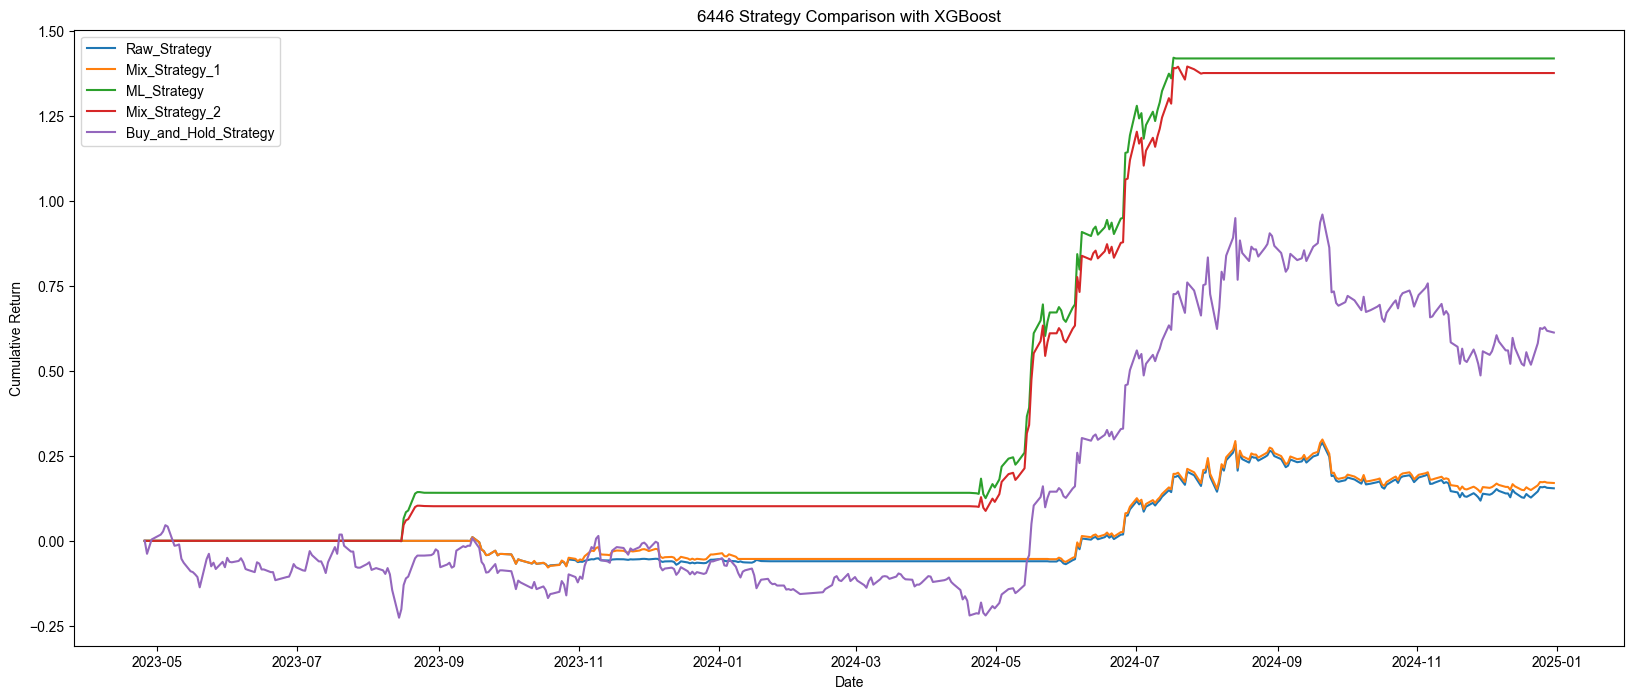

In [ ]:
# 調整 benchmark 的基準位置，讓累積報酬率從 0 開始
strategy_results['benchmark_return'] = strategy_results['benchmark_return'] - strategy_results['benchmark_return'].iloc[0]

print(f"Benchmark Return: {strategy_results['benchmark_return'].iloc[-1]:.2%}")
print(f"Raw Strategy Return: {strategy_results[3].iloc[-1]:.2%}")
print(f"Mix Strategy 1 Return(技術指標為主): {strategy_results[0].iloc[-1]:.2%}")
print(f"ML Strategy Return: {strategy_results[1].iloc[-1]:.2%}")
print(f"Mix Strategy 2 Return(機器學習為主): {strategy_results[2].iloc[-1]:.2%}")

plt.figure(figsize = (20,8))
plt.plot(strategy_results.index, strategy_results[3], color = tab10[0], label = 'Raw_Strategy')
plt.plot(strategy_results.index, strategy_results[0], color = tab10[1], label = 'Mix_Strategy_1')
plt.plot(strategy_results.index, strategy_results[1], color = tab10[2], label = 'ML_Strategy')
plt.plot(strategy_results.index, strategy_results[2], color = tab10[3], label = 'Mix_Strategy_2')
plt.plot(strategy_results.index, strategy_results['benchmark_return'], color = tab10[4], label = 'Buy_and_Hold_Strategy')
plt.title(f'{pool[0]} Strategy Comparison with XGBoost')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [ ]:
df_analyze = df
df_analyze = df_analyze.set_index('日期', drop = False)
backtest_start = df_test['日期'].iloc[0]
backtest_end = df_test['日期'].iloc[-1]

print(f"回測期間：{backtest_start} 至 {backtest_end}")

回測期間：2023-04-25 00:00:00 至 2024-12-30 00:00:00


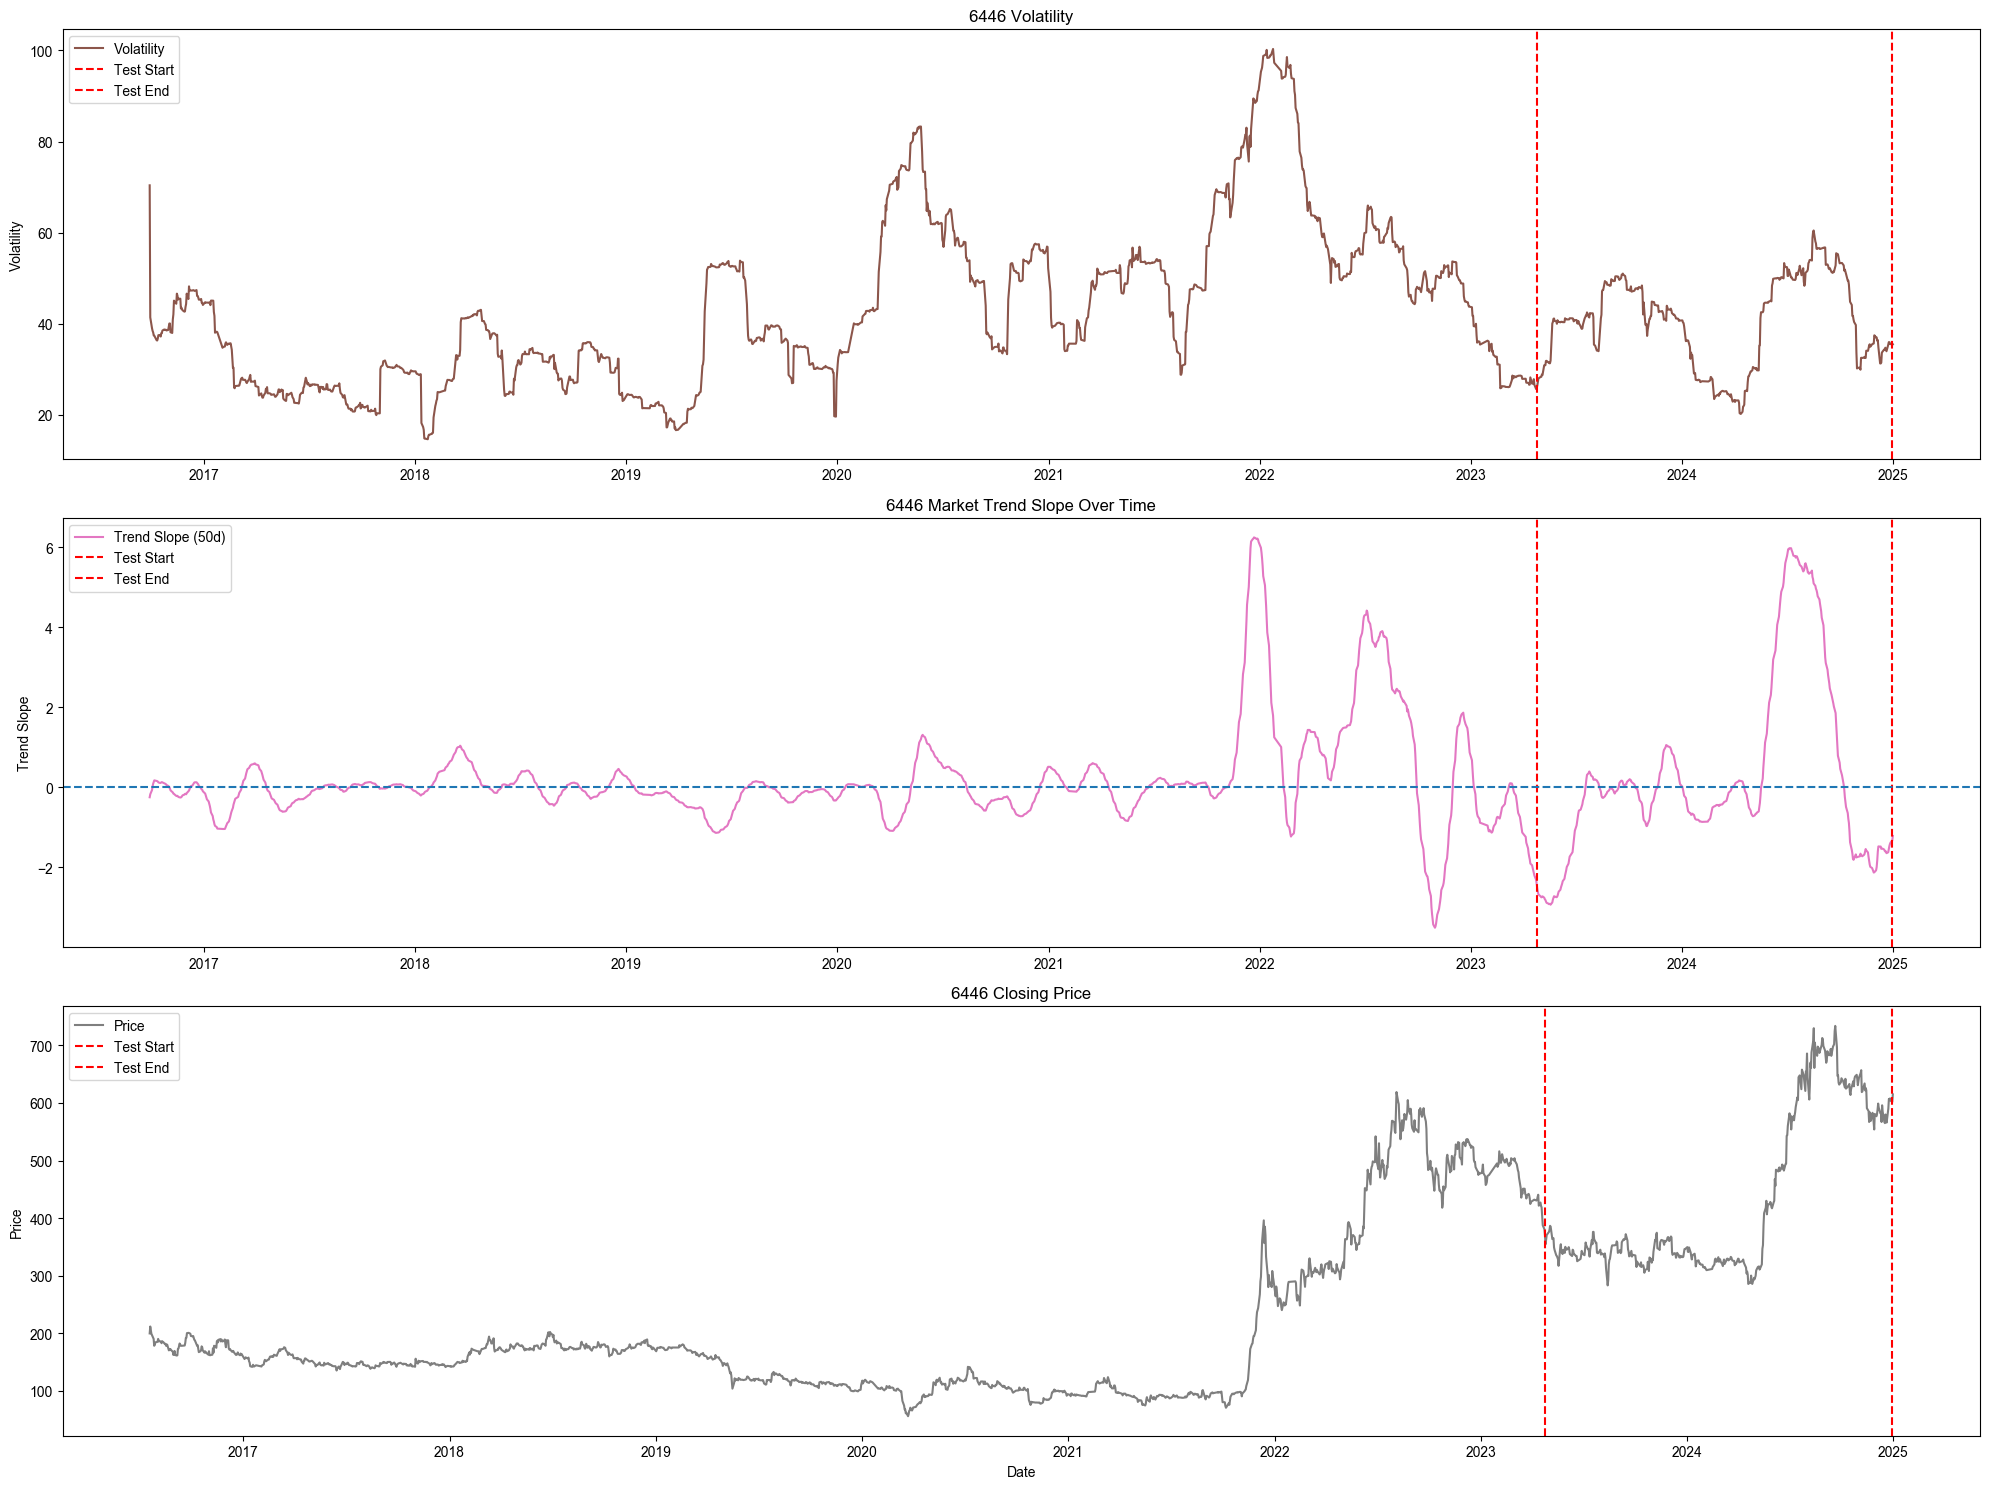

In [ ]:
# 設定圖表大小
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15), sharex=False)

# 第一張圖：波動率 (Volatility)
df_analyze['Volatility'] = df_analyze['報酬率'].rolling(window=50).std() * np.sqrt(252)
axes[0].plot(df_analyze.index, df_analyze['Volatility'], color=tab10[5], label = "Volatility")
axes[0].axvline(pd.to_datetime(backtest_start), color='red', linestyle='--', label="Test Start")
axes[0].axvline(pd.to_datetime(backtest_end), color='red', linestyle='--', label="Test End")
axes[0].set_title(f'{pool[0]} Volatility')
axes[0].set_ylabel('Volatility')
axes[0].legend()

# 第二張圖：50日均線斜率 (Trend Slope)
df_analyze['trend_slope'] = df_analyze['收盤價'].rolling(window=50).apply(lambda x: np.polyfit(range(len(x)), x, 1)[0], raw=True)
axes[1].plot(df_analyze.index, df_analyze['trend_slope'], label='Trend Slope (50d)', color=tab10[6])
axes[1].axvline(pd.to_datetime(backtest_start), color='red', linestyle='--', label="Test Start")
axes[1].axvline(pd.to_datetime(backtest_end), color='red', linestyle='--', label="Test End")
axes[1].axhline(0, linestyle='--', color=tab10[0])
axes[1].set_title(f"{pool[0]} Market Trend Slope Over Time")
axes[1].set_ylabel("Trend Slope")
axes[1].legend()

# 第三張圖：收盤價 (Closing Price)
axes[2].plot(df_analyze.index, df_analyze['收盤價'], color=tab10[7], label = 'Price')
axes[2].axvline(pd.to_datetime(backtest_start), color='red', linestyle='--', label="Test Start")
axes[2].axvline(pd.to_datetime(backtest_end), color='red', linestyle='--', label="Test End")
axes[2].set_title(f"{pool[0]} Closing Price")
axes[2].set_xlabel('Date')
axes[2].set_ylabel("Price")
axes[2].legend()

# 調整子圖間距
plt.tight_layout()

# 顯示圖表
plt.show()

In [ ]:
strategy_analysis_1 = strategy_results.copy()
strategy_analysis_1 = strategy_analysis_1.rename(columns = {0: 'Mix_Strategy_1', 1:'ML_Strategy', 2:'Mix_Strategy_2', 3:'Raw_Strategy'})


strategy_analysis_2 = test_results.copy()
strategy_analysis_2 = strategy_analysis_2.rename(columns = {0: 'Mix_Strategy_1', 1:'ML_Strategy', 2:'Mix_Strategy_2', 3:'Raw_Strategy'})

strategy_analysis_3 = leverage_results.copy()
strategy_analysis_3 = strategy_analysis_3.rename(columns = {0: 'Mix_Strategy_1', 1:'ML_Strategy', 2:'Mix_Strategy_2', 3:'Raw_Strategy'})


strategy_analysis_4 = sharp_results.copy()
strategy_analysis_4 = strategy_analysis_4.rename(columns = {0: 'Mix_Strategy_1', 1:'ML_Strategy', 2:'Mix_Strategy_2', 3:'Raw_Strategy'})


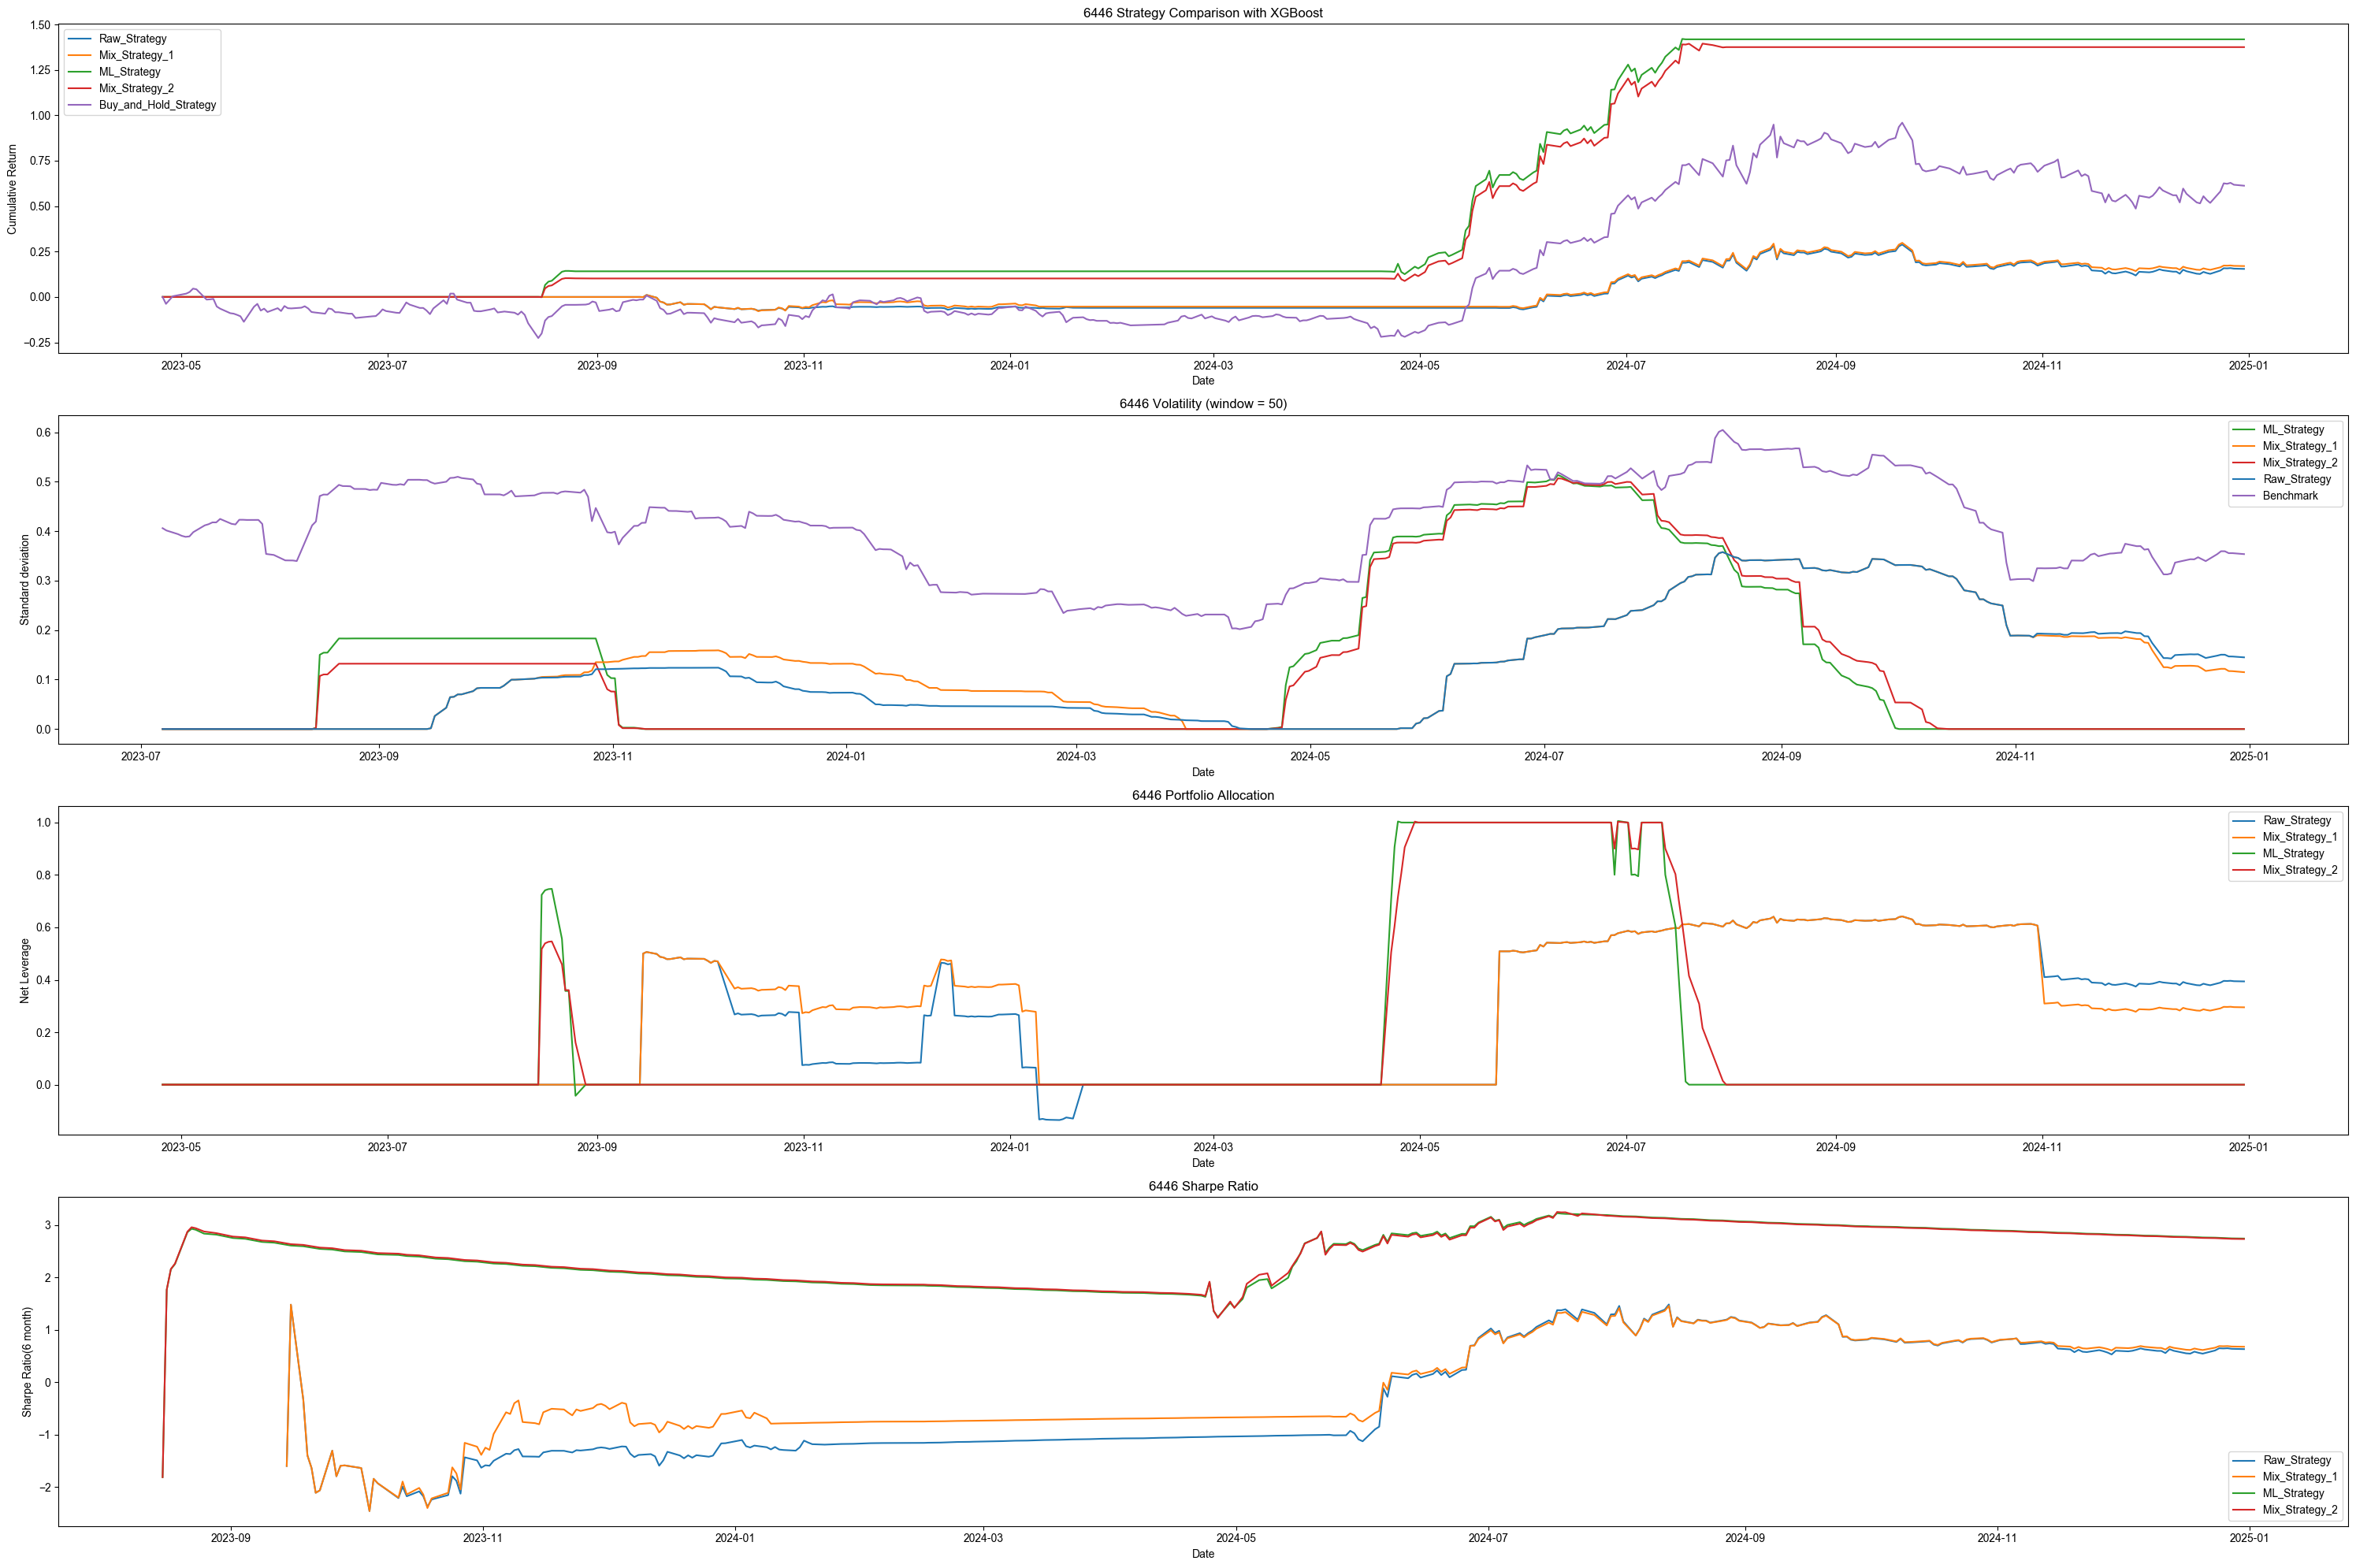

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30, 20), sharex=False)


# 四個策略和基準的波動度圖表
days = 50
strategy_analysis_2['ML_Strategy_vol'] = strategy_analysis_2['ML_Strategy'].rolling(window=days).std() * np.sqrt(252)
strategy_analysis_2['Mix_Strategy_1_vol'] = strategy_analysis_2['Mix_Strategy_1'].rolling(window=days).std() * np.sqrt(252)
strategy_analysis_2['Mix_Strategy_2_vol'] = strategy_analysis_2['Mix_Strategy_2'].rolling(window=days).std() * np.sqrt(252)
strategy_analysis_2['Raw_Strategy_vol'] = strategy_analysis_2['Raw_Strategy'].rolling(window=days).std() * np.sqrt(252)
strategy_analysis_2['benchmark_vol'] = strategy_analysis_2['benchmark'].rolling(window=days).std() * np.sqrt(252)

axes[1].plot(strategy_analysis_2.index, strategy_analysis_2['ML_Strategy_vol'], label='ML_Strategy', color=tab10[2])
axes[1].plot(strategy_analysis_2.index, strategy_analysis_2['Mix_Strategy_1_vol'], label='Mix_Strategy_1', color=tab10[1])
axes[1].plot(strategy_analysis_2.index, strategy_analysis_2['Mix_Strategy_2_vol'], label='Mix_Strategy_2', color=tab10[3])
axes[1].plot(strategy_analysis_2.index, strategy_analysis_2['Raw_Strategy_vol'], label='Raw_Strategy', color=tab10[0])
axes[1].plot(strategy_analysis_2.index, strategy_analysis_2['benchmark_vol'], label='Benchmark', color=tab10[4])
axes[1].set_title(f'{pool[0]} Volatility (window = {days})')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Standard deviation')
axes[1].legend()



axes[0].plot(strategy_analysis_1.index, strategy_analysis_1['Raw_Strategy'], color = tab10[0], label = 'Raw_Strategy')
axes[0].plot(strategy_analysis_1.index, strategy_analysis_1['Mix_Strategy_1'], color = tab10[1], label = 'Mix_Strategy_1')
axes[0].plot(strategy_analysis_1.index, strategy_analysis_1['ML_Strategy'], color = tab10[2], label = 'ML_Strategy')
axes[0].plot(strategy_analysis_1.index, strategy_analysis_1['Mix_Strategy_2'], color = tab10[3], label = 'Mix_Strategy_2')
axes[0].plot(strategy_analysis_1.index, strategy_analysis_1['benchmark_return'], color = tab10[4], label = 'Buy_and_Hold_Strategy')
axes[0].set_title(f'{pool[0]} Strategy Comparison with XGBoost')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cumulative Return')
axes[0].legend()


axes[2].plot(strategy_analysis_3.index, strategy_analysis_3['Raw_Strategy'], color = tab10[0], label = 'Raw_Strategy')
axes[2].plot(strategy_analysis_3.index, strategy_analysis_3['Mix_Strategy_1'], color = tab10[1], label = 'Mix_Strategy_1')
axes[2].plot(strategy_analysis_3.index, strategy_analysis_3['ML_Strategy'], color = tab10[2], label = 'ML_Strategy')
axes[2].plot(strategy_analysis_3.index, strategy_analysis_3['Mix_Strategy_2'], color = tab10[3], label = 'Mix_Strategy_2')
axes[2].set_title(f'{pool[0]} Portfolio Allocation')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Net Leverage')
axes[2].legend()

axes[3].plot(strategy_analysis_4.index, strategy_analysis_4['Raw_Strategy'], color = tab10[0], label = 'Raw_Strategy')
axes[3].plot(strategy_analysis_4.index, strategy_analysis_4['Mix_Strategy_1'], color = tab10[1], label = 'Mix_Strategy_1')
axes[3].plot(strategy_analysis_4.index, strategy_analysis_4['ML_Strategy'], color = tab10[2], label = 'ML_Strategy')
axes[3].plot(strategy_analysis_4.index, strategy_analysis_4['Mix_Strategy_2'], color = tab10[3], label = 'Mix_Strategy_2')
axes[3].set_title(f'{pool[0]} Sharpe Ratio')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Sharpe Ratio(6 month)')
axes[3].legend()
# 調整子圖間距
plt.tight_layout()

# 顯示圖表
plt.show()

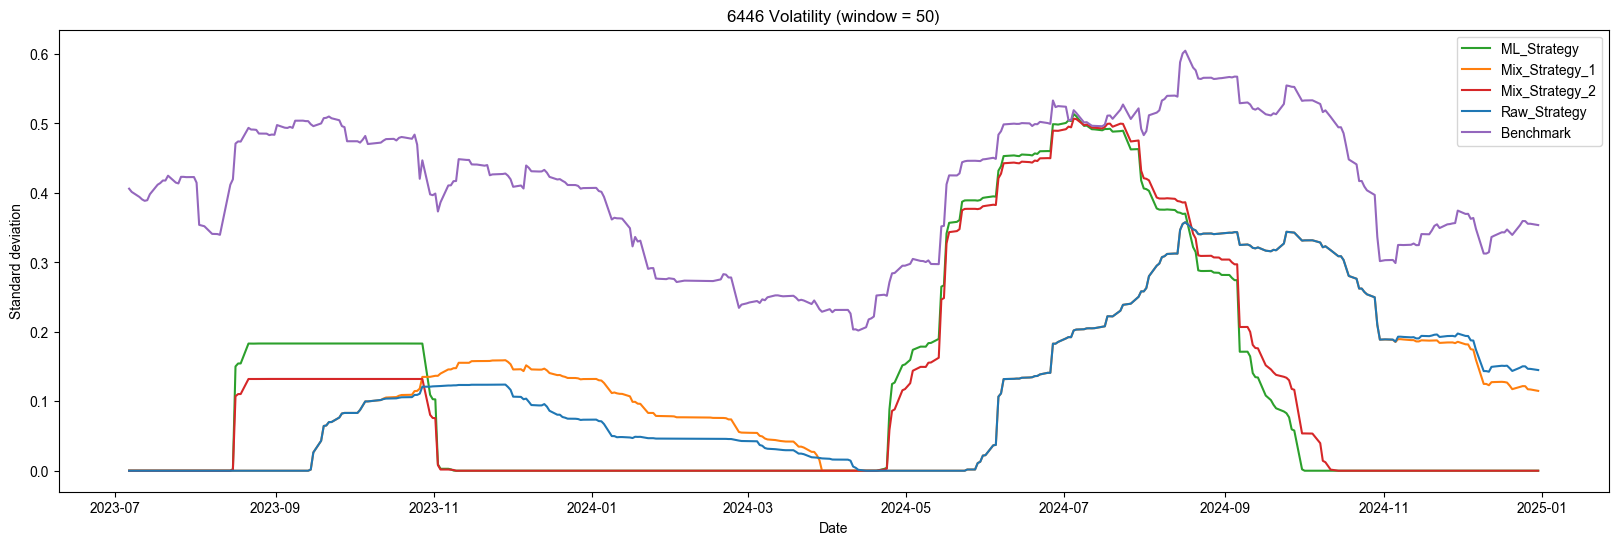

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(strategy_analysis_2.index, strategy_analysis_2['ML_Strategy_vol'], label='ML_Strategy', color=tab10[2])
plt.plot(strategy_analysis_2.index, strategy_analysis_2['Mix_Strategy_1_vol'], label='Mix_Strategy_1', color=tab10[1])
plt.plot(strategy_analysis_2.index, strategy_analysis_2['Mix_Strategy_2_vol'], label='Mix_Strategy_2', color=tab10[3])
plt.plot(strategy_analysis_2.index, strategy_analysis_2['Raw_Strategy_vol'], label='Raw_Strategy', color=tab10[0])
plt.plot(strategy_analysis_2.index, strategy_analysis_2['benchmark_vol'], label='Benchmark', color=tab10[4])
plt.title(f'{pool[0]} Volatility (window = {days})')
plt.xlabel('Date')
plt.ylabel('Standard deviation')
plt.legend()
plt.show()

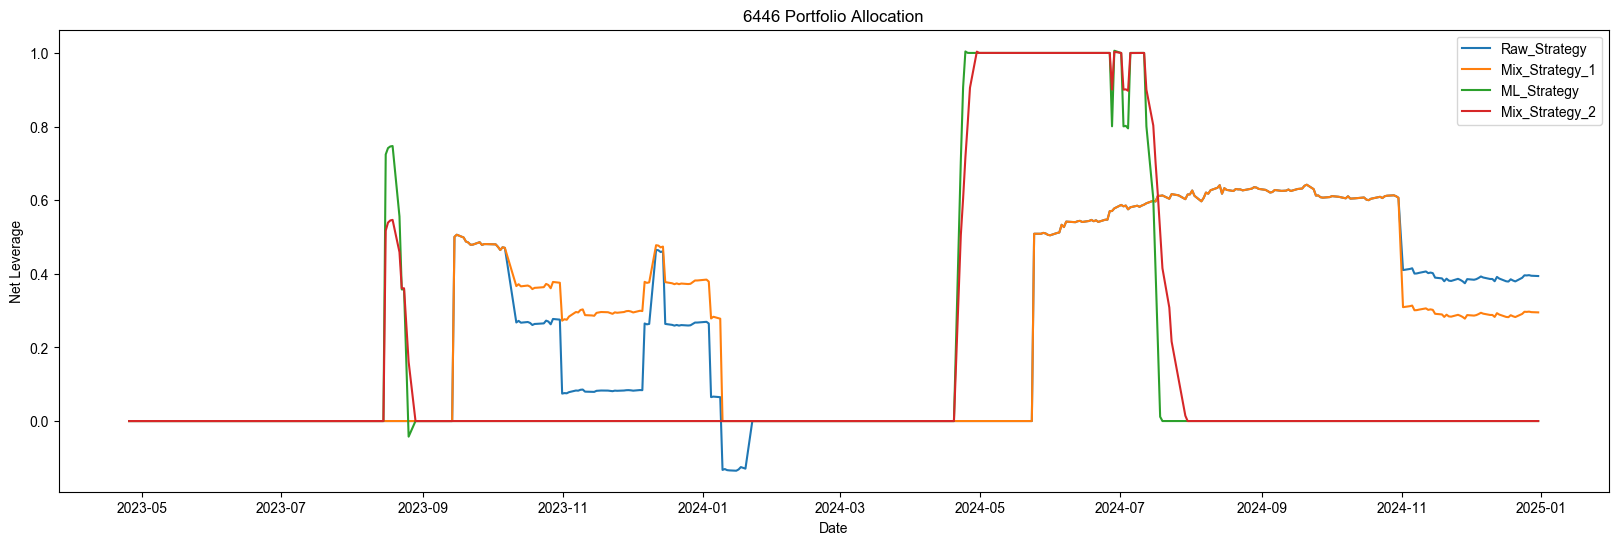

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(strategy_analysis_3.index, strategy_analysis_3['Raw_Strategy'], color = tab10[0], label = 'Raw_Strategy')
plt.plot(strategy_analysis_3.index, strategy_analysis_3['Mix_Strategy_1'], color = tab10[1], label = 'Mix_Strategy_1')
plt.plot(strategy_analysis_3.index, strategy_analysis_3['ML_Strategy'], color = tab10[2], label = 'ML_Strategy')
plt.plot(strategy_analysis_3.index, strategy_analysis_3['Mix_Strategy_2'], color = tab10[3], label = 'Mix_Strategy_2')
plt.title(f'{pool[0]} Portfolio Allocation')
plt.xlabel('Date')
plt.ylabel('Net Leverage')
plt.legend()
plt.show()

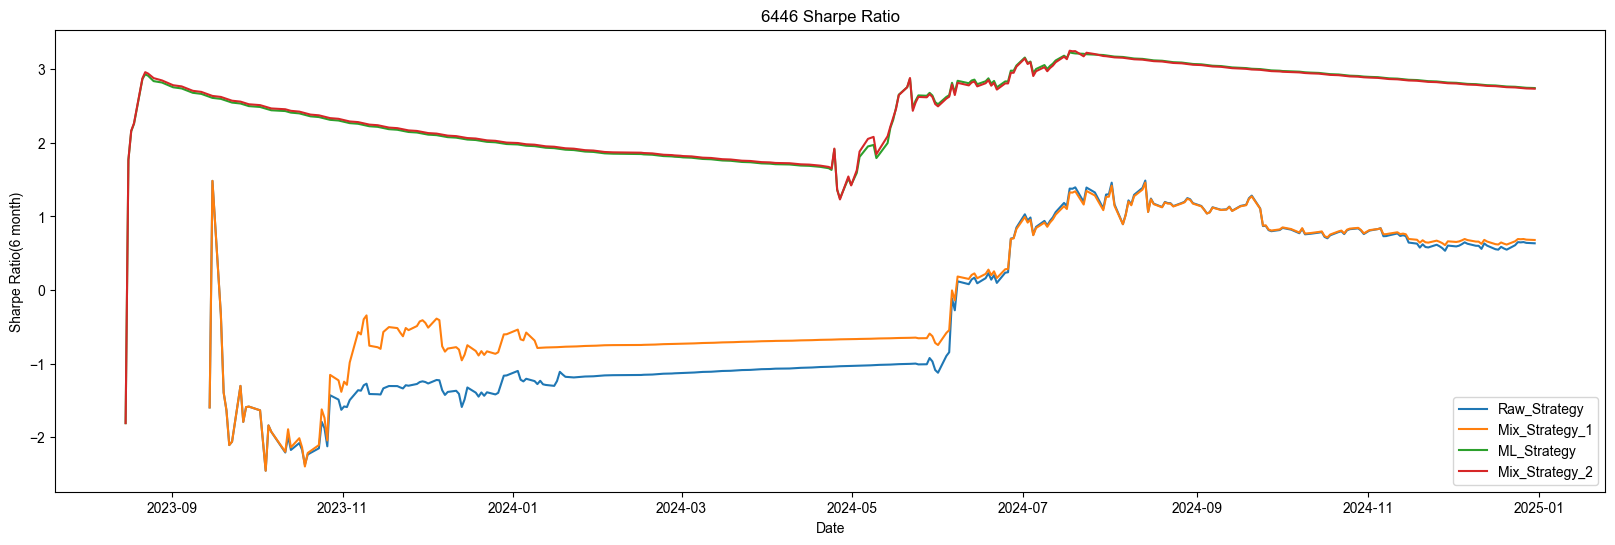

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(strategy_analysis_4.index, strategy_analysis_4['Raw_Strategy'], color = tab10[0], label = 'Raw_Strategy')
plt.plot(strategy_analysis_4.index, strategy_analysis_4['Mix_Strategy_1'], color = tab10[1], label = 'Mix_Strategy_1')
plt.plot(strategy_analysis_4.index, strategy_analysis_4['ML_Strategy'], color = tab10[2], label = 'ML_Strategy')
plt.plot(strategy_analysis_4.index, strategy_analysis_4['Mix_Strategy_2'], color = tab10[3], label = 'Mix_Strategy_2')
plt.title(f'{pool[0]} Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio(6 month)')
plt.legend()
plt.show()

--2025-02-27 02:03:56--  https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf [following]
--2025-02-27 02:03:56--  https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21663376 (21M) [application/octet-stream]
Saving to: ‘MicrosoftJhengHei.ttf’

MicrosoftJhengHei.t 100%[===================>]  20.66M  --.-KB/s    in 0.1s    

2025-02-27 02:03:56 (183 MB/s) - ‘MicrosoftJhengHei.ttf’ saved [21663376/21663376]



Start date,2023-04-25
End date,2024-12-30
Total months,19
,Backtest
Annual return,9.156%
Cumulative returns,15.441%
Annual volatility,15.755%
Sharpe ratio,0.63
Calmar ratio,0.69
Stability,0.42
Max drawdown,-13.23%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.23,2024-09-20,2024-11-28,NaT,NaN
1,8.56,2023-09-15,2023-10-18,2024-06-13,179
2,7.30,2024-08-01,2024-08-05,2024-08-09,7
3,6.06,2024-08-13,2024-08-14,2024-09-20,28
4,3.47,2024-07-23,2024-07-29,2024-08-01,6


Top 10 long positions of all time,max
sid,
6446,64.20%


Top 10 short positions of all time,max
sid,
6446,-13.50%


Top 10 positions of all time,max
sid,
6446,64.20%


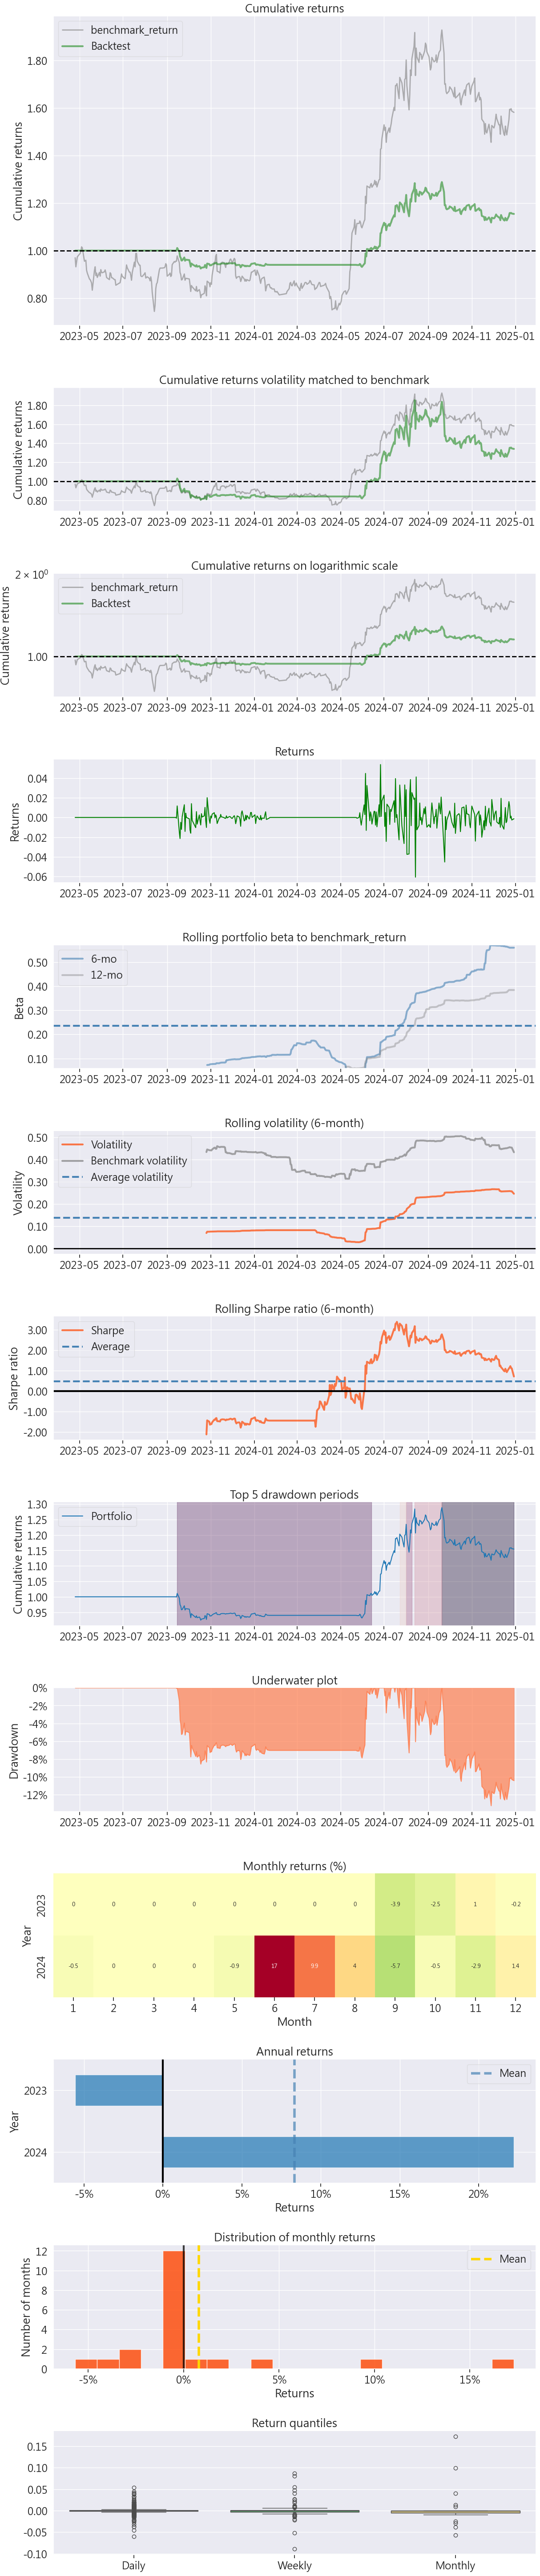

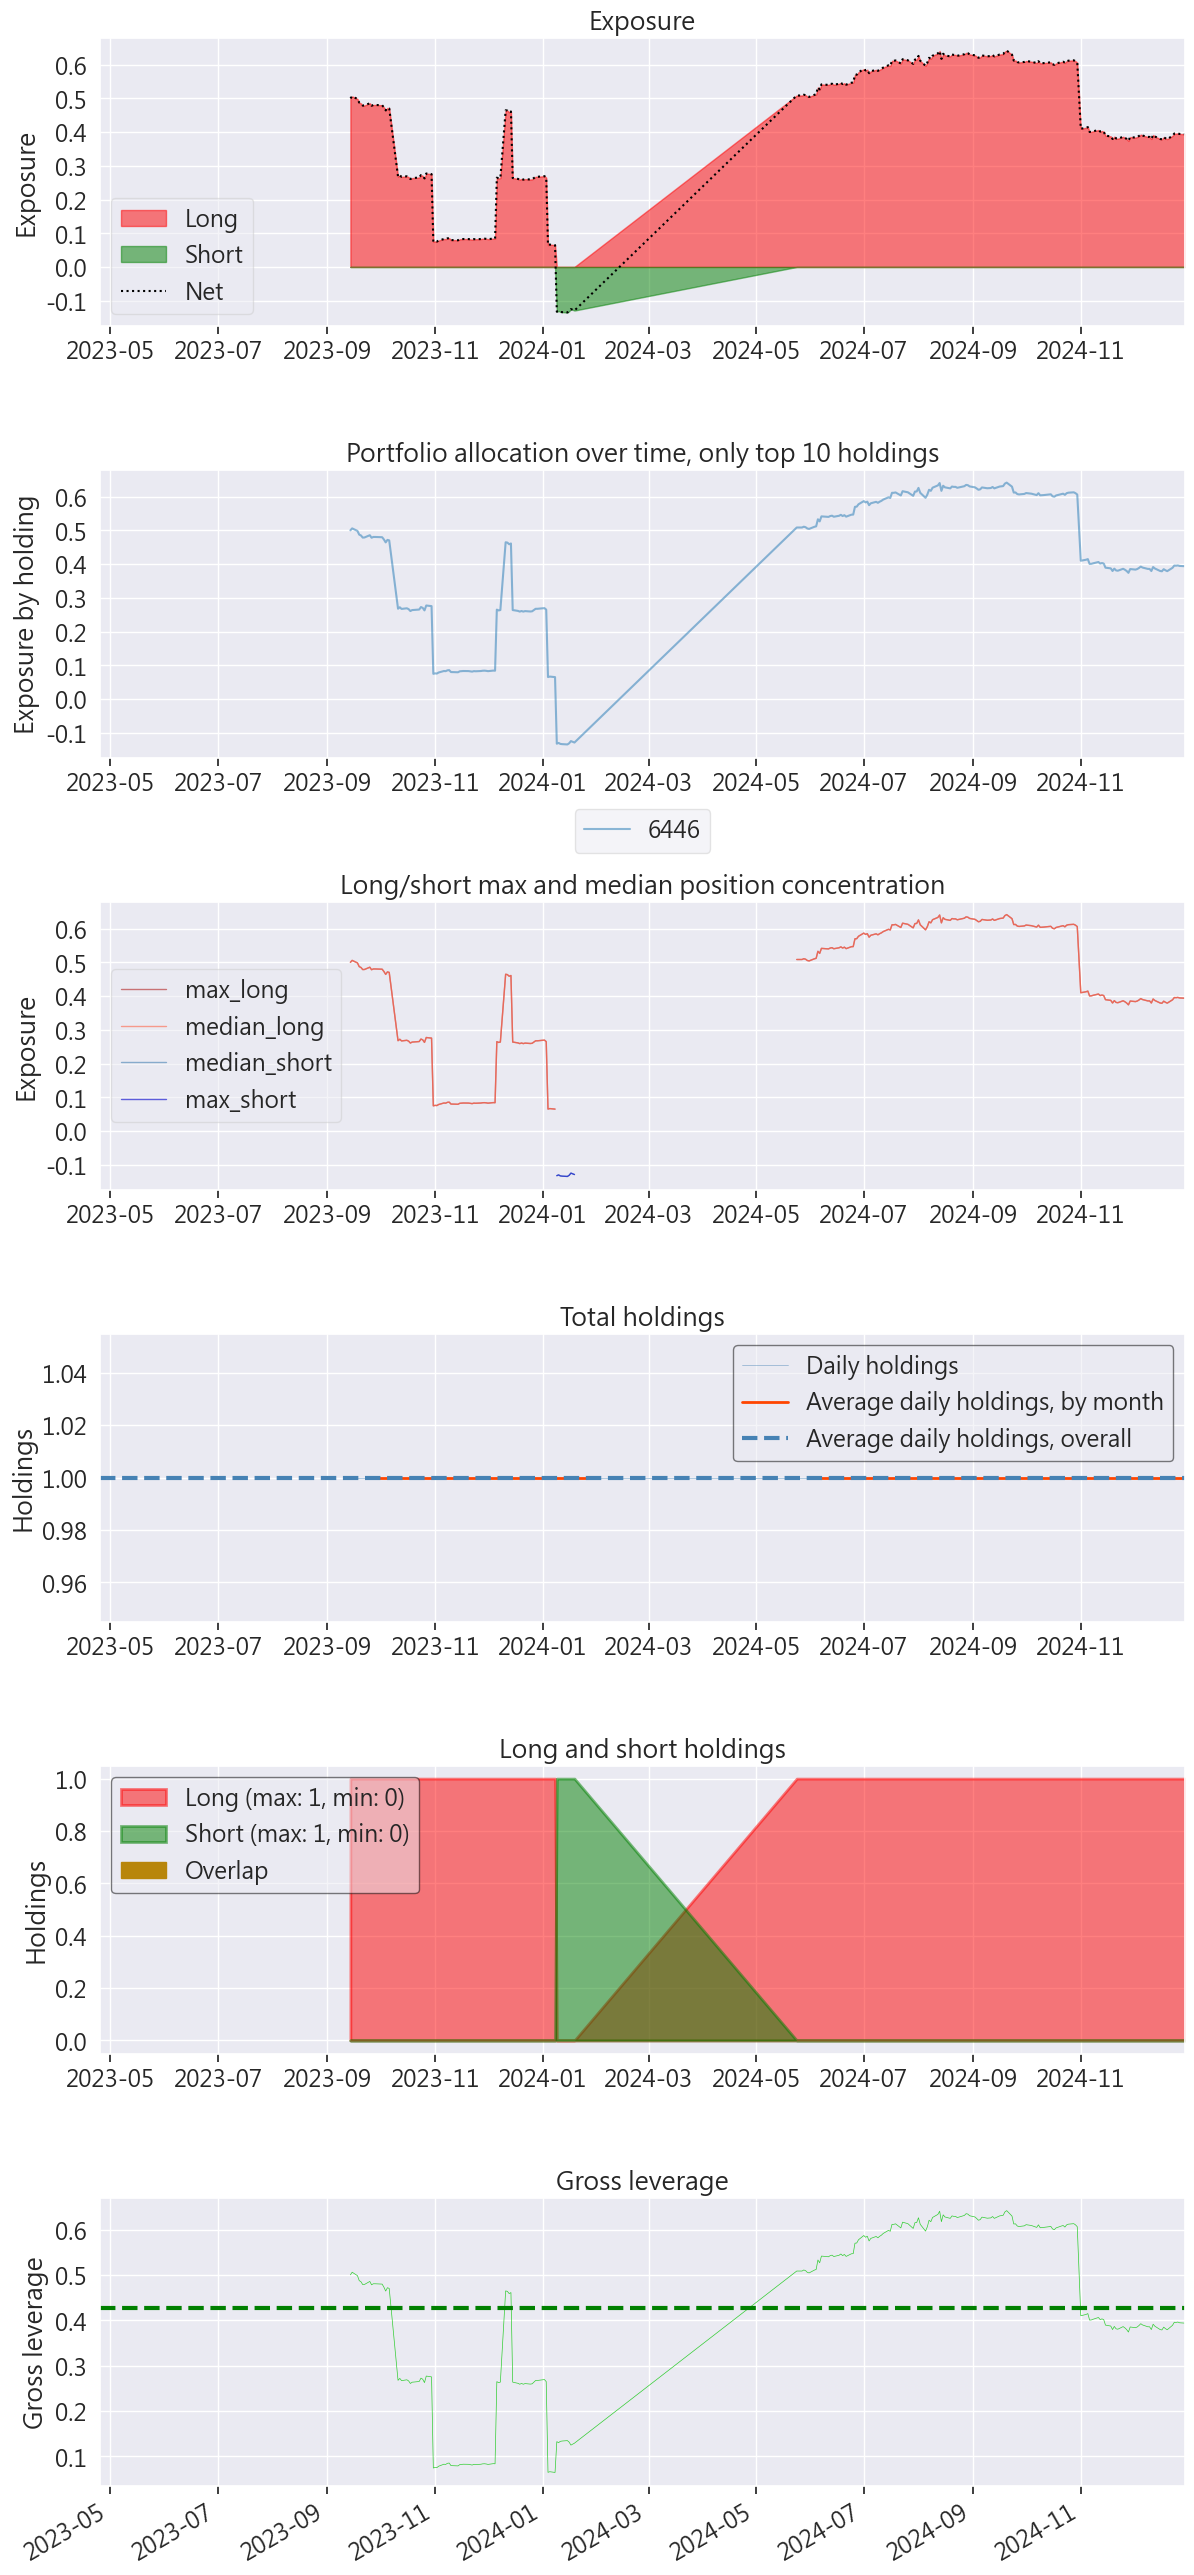

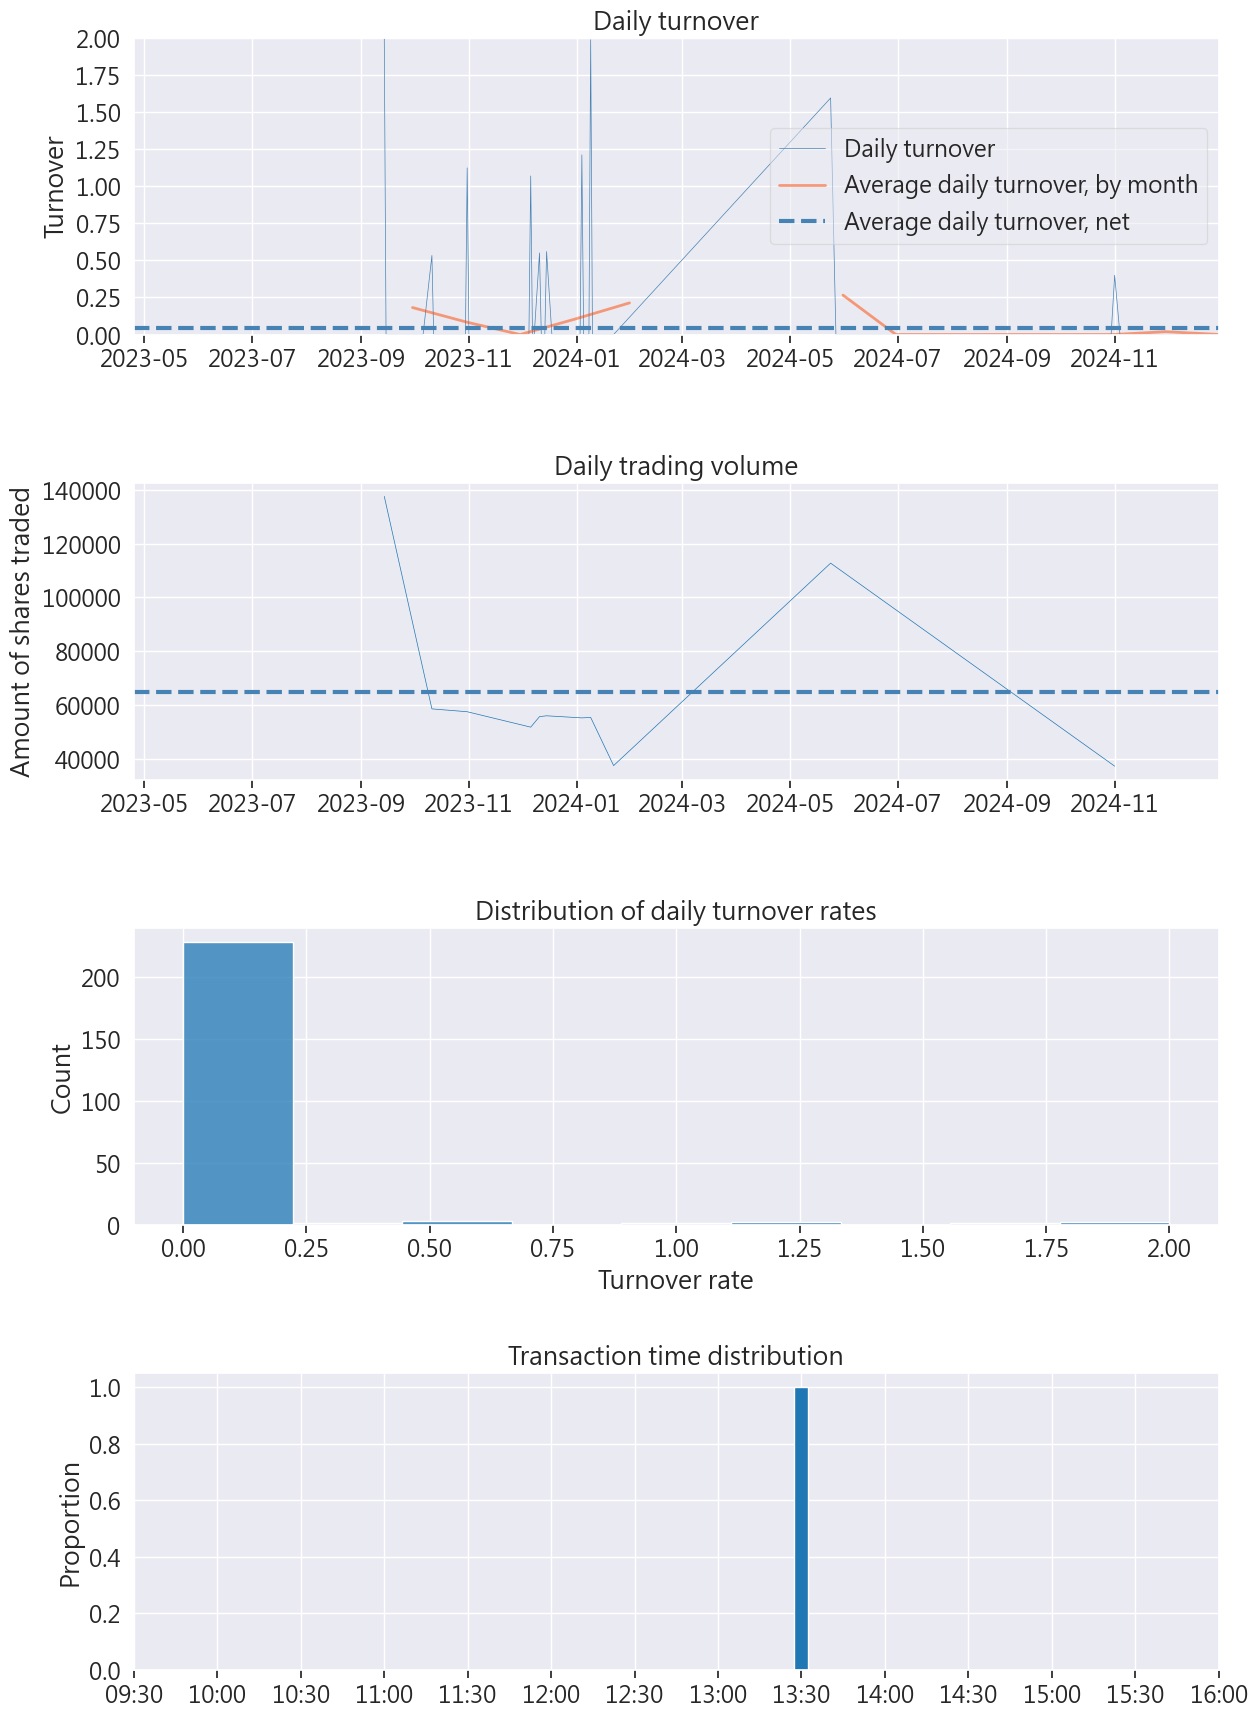

In [ ]:
import matplotlib
import matplotlib.font_manager as fm
!wget -O MicrosoftJhengHei.ttf https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
!wget -O ArialUnicodeMS.ttf https://github.com/texttechnologylab/DHd2019BoA/raw/master/fonts/Arial%20Unicode%20MS.TTF

fm.fontManager.addfont('MicrosoftJhengHei.ttf')
matplotlib.rc('font', family='Microsoft Jheng Hei')

fm.fontManager.addfont('ArialUnicodeMS.ttf')
matplotlib.rc('font', family='Arial Unicode MS')

import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return
pyfolio.tears.create_full_tear_sheet(returns=returns,
                                     positions=positions,
                                     transactions=transactions,
                                     benchmark_rets=benchmark_rets
                                    )

In [ ]:
corr = df_analyze[['trend_slope', 'Volatility']].corr()
print(f"Trend Slope & Volatility Correlation Matrix")
print(corr)
print("-"*50)



from scipy.stats import ttest_ind

# 設定兩組回報率
returns_raw = test_results[0]
returns_mix1 = test_results[1]
returns_ml = test_results[2]
returns_mix2 = test_results[3]
returns_bh = test_results['benchmark']


testing = [returns_raw, returns_mix1, returns_ml, returns_mix2]

for var in testing:
    var_name = [name for name, value in globals().items() if value is var][0]  # 找到變數名稱
    t_stat, p_value = ttest_ind(var, returns_bh, equal_var=False)
    print(f"{var_name}: T-statistic = {t_stat:.4f}, P-value = {p_value:.4f}")


Trend Slope & Volatility Correlation Matrix
             trend_slope  Volatility
trend_slope     1.000000   -0.010529
Volatility     -0.010529    1.000000
--------------------------------------------------
returns_raw: T-statistic = -0.0730, P-value = 0.9419
returns_mix1: T-statistic = -0.7528, P-value = 0.4517
returns_ml: T-statistic = -0.7003, P-value = 0.4839
returns_mix2: T-statistic = -0.3011, P-value = 0.7634
